EXPLORATION

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
music_health_df = pd.read_csv("Music & Mental Health.csv")

In [18]:
music_health_df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


In [19]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

I can see that there are some missing values, that I will have to deal with in a second moment. 

I don't like the names of the columns with spaces, I replace the spaces with _. I make also further changes, to simplify the names of the columns.

In [20]:
music_health_df.columns = [col.replace(" ", "_").replace("Frequency", "Freq").replace("[","").replace("]","") for col in music_health_df.columns]

I remove the first column, because it is irrelevant.

In [21]:
music_health_df.drop(columns = "Timestamp", axis = 1, inplace = True)

I decide to remove also other columns, that are not useful for the study of the dataset.

In [22]:
music_health_df.Permissions.unique()

array(['I understand.'], dtype=object)

In [23]:
music_health_df.drop(["Permissions"], axis = 1, inplace = True)

In [24]:
music_health_df.drop(["BPM"], axis = 1, inplace = True)

In [25]:
music_health_df.drop(["Foreign_languages"], axis = 1, inplace = True)

In [26]:
music_health_df.drop(["Primary_streaming_service"], axis = 1, inplace = True)

In [27]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    735 non-null    float64
 1   Hours_per_day          736 non-null    float64
 2   While_working          733 non-null    object 
 3   Instrumentalist        732 non-null    object 
 4   Composer               735 non-null    object 
 5   Fav_genre              736 non-null    object 
 6   Exploratory            736 non-null    object 
 7   Freq_Classical         736 non-null    object 
 8   Freq_Country           736 non-null    object 
 9   Freq_EDM               736 non-null    object 
 10  Freq_Folk              736 non-null    object 
 11  Freq_Gospel            736 non-null    object 
 12  Freq_Hip_hop           736 non-null    object 
 13  Freq_Jazz              736 non-null    object 
 14  Freq_K_pop             736 non-null    object 
 15  Freq_L

In [28]:
backup_dataset = music_health_df.copy() #I create a backup copy of the dataset

Now I deal with the missing values:

In [29]:
music_health_df[music_health_df["Music_effects"].isnull()].index

Int64Index([0, 1, 161, 168, 338, 441, 532, 561], dtype='int64')

In [30]:
music_health_df.drop(music_health_df[music_health_df["Music_effects"].isnull()].index, inplace = True) 
#I delete the rows that don't have a value in the last column, because they are irrelevant: I won't be able to use them for my study.

In [31]:
print(music_health_df[music_health_df["Age"].isnull()].index)
print(music_health_df[music_health_df["While_working"].isnull()].index)
print(music_health_df[music_health_df["Instrumentalist"].isnull()].index)

Int64Index([12], dtype='int64')
Int64Index([57, 426], dtype='int64')
Int64Index([223, 408, 572], dtype='int64')


In [32]:
music_health_df.drop(music_health_df[music_health_df["While_working"].isnull()].index, inplace = True)

In [33]:
music_health_df.drop(music_health_df[music_health_df["Instrumentalist"].isnull()].index, inplace = True)

In [35]:
#I replace the remaining missing value in the column "Age" with the mean of this column(rounded)
music_health_df["Age"].fillna(round(music_health_df["Age"].mean()), inplace = True)

In [36]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 2 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    723 non-null    float64
 1   Hours_per_day          723 non-null    float64
 2   While_working          723 non-null    object 
 3   Instrumentalist        723 non-null    object 
 4   Composer               723 non-null    object 
 5   Fav_genre              723 non-null    object 
 6   Exploratory            723 non-null    object 
 7   Freq_Classical         723 non-null    object 
 8   Freq_Country           723 non-null    object 
 9   Freq_EDM               723 non-null    object 
 10  Freq_Folk              723 non-null    object 
 11  Freq_Gospel            723 non-null    object 
 12  Freq_Hip_hop           723 non-null    object 
 13  Freq_Jazz              723 non-null    object 
 14  Freq_K_pop             723 non-null    object 
 15  Freq_L

Now I don't have missing value.

In [37]:
music_health_df.describe()

,Age,Hours_per_day,Anxiety,Depression,Insomnia,OCD
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,25.149378,3.573375,5.838866,4.803596,3.728216,2.647303
std,11.928682,3.009494,2.786860,3.015567,3.082172,2.846868
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,10.000000,10.000000,10.000000,10.000000


Since, a lot of columns have similar values, that represent the frequences of listening of the different genres, I substitute the object values with numerical values.

In [45]:
music_health_df.Freq_Classical.unique()

1

In [50]:
for i in music_health_df.columns[7:23:1]:
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[0], i] = 0
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[1], i] = 1
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[2], i] = 2
  music_health_df.loc[music_health_df[i] == music_health_df[i].unique()[3], i] = 3

In [91]:
music_health_df[music_health_df.columns[7:23]] = music_health_df[music_health_df.columns[7:23]].astype(int)

I repeat the same process for the columns with values "Yes" and "No" and for the column Music Effects.

In [61]:
for i in music_health_df.columns[2:5]:
  music_health_df.loc[music_health_df[i] == "Yes", i] = 0
  music_health_df.loc[music_health_df[i] == "No", i] = 1

In [62]:
music_health_df.loc[music_health_df["Exploratory"] == "Yes", "Exploratory"] = 0
music_health_df.loc[music_health_df["Exploratory"] == "No", "Exploratory"] = 1

In [89]:
music_health_df[music_health_df.columns[2:5]] = music_health_df[music_health_df.columns[2:5]].astype(int)
music_health_df["Exploratory"] = music_health_df["Exploratory"].astype(int)

In [90]:
music_health_df.Music_effects.unique()

array([0, 1, 2], dtype=int64)

In [65]:
music_health_df.loc[music_health_df["Music_effects"] == music_health_df.Music_effects.unique()[0], "Music_effects"] = 0
music_health_df.loc[music_health_df["Music_effects"] == music_health_df.Music_effects.unique()[1], "Music_effects"] = 1
music_health_df.loc[music_health_df["Music_effects"] == music_health_df.Music_effects.unique()[2], "Music_effects"] = 2

In [92]:
music_health_df["Music_effects"] = music_health_df["Music_effects"].astype(int)

In [109]:
music_health_df[music_health_df.columns[23:27]] = music_health_df[music_health_df.columns[23:27]].astype(int)
music_health_df[music_health_df.columns[0:2]] = music_health_df[music_health_df.columns[0:2]].astype(int)

In [110]:
music_health_df.head()

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
2,18,4,1,1,1,Video game music,1,0,0,0,...,0,0,0,0,0,7,7,10,2,0
3,61,2,0,1,0,Jazz,0,1,0,1,...,1,1,1,1,1,9,7,3,3,1
4,18,4,0,1,1,R&B,0,0,0,2,...,1,2,2,1,2,7,2,5,9,1
5,18,5,0,0,0,Jazz,0,2,1,1,...,2,2,2,2,1,8,8,7,7,1
6,18,3,0,0,1,Video game music,0,1,0,2,...,0,3,1,1,3,4,8,6,0,1


In [111]:
music_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 2 to 735
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    723 non-null    int32 
 1   Hours_per_day          723 non-null    int32 
 2   While_working          723 non-null    int32 
 3   Instrumentalist        723 non-null    int32 
 4   Composer               723 non-null    int32 
 5   Fav_genre              723 non-null    object
 6   Exploratory            723 non-null    int32 
 7   Freq_Classical         723 non-null    int32 
 8   Freq_Country           723 non-null    int32 
 9   Freq_EDM               723 non-null    int32 
 10  Freq_Folk              723 non-null    int32 
 11  Freq_Gospel            723 non-null    int32 
 12  Freq_Hip_hop           723 non-null    int32 
 13  Freq_Jazz              723 non-null    int32 
 14  Freq_K_pop             723 non-null    int32 
 15  Freq_Latin             

Now I study the correlation between the columns of the dataset, removing the column "Fav_genre" that is non numerical.

In [129]:
corr_matrix = music_health_df[music_health_df.columns[music_health_df.columns != "Fav_genre"]].corr()
corr_matrix

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Exploratory,Freq_Classical,Freq_Country,Freq_EDM,Freq_Folk,...,Freq_Pop,Freq_R&B,Freq_Rap,Freq_Rock,Freq_Video_game_music,Anxiety,Depression,Insomnia,OCD,Music_effects
Age,1.000000,-0.039061,0.071911,0.123198,0.027556,0.179529,0.015545,0.038992,-0.048618,0.112093,...,-0.110165,0.051798,-0.081403,0.080596,-0.119916,-0.183197,-0.114584,0.008228,-0.131003,-0.075848
Hours_per_day,-0.039061,1.000000,-0.287855,0.020297,-0.137567,-0.137684,-0.052482,0.011612,0.030578,0.084713,...,-0.076480,-0.009146,0.066164,-0.025861,0.082077,0.046722,0.099280,0.136558,0.113802,0.003299
While_working,0.071911,-0.287855,1.000000,0.080485,0.047078,0.139879,-0.029436,-0.086682,-0.058703,-0.046765,...,0.000823,-0.046848,-0.024503,0.025686,-0.039358,-0.036775,-0.055878,-0.034423,-0.085553,-0.127082
Instrumentalist,0.123198,0.020297,0.080485,1.000000,0.402519,0.070874,-0.178914,-0.011585,0.035843,0.023213,...,0.037467,0.097467,0.146695,-0.015988,-0.064873,-0.031435,-0.006769,-0.030988,-0.019955,-0.078175
Composer,0.027556,-0.137567,0.047078,0.402519,1.000000,0.098986,-0.041722,-0.050426,0.017765,-0.063618,...,0.017535,0.003569,0.058584,-0.044812,0.039762,-0.004041,-0.054202,-0.095047,-0.015367,-0.069629
Exploratory,0.179529,-0.137684,0.139879,0.070874,0.098986,1.000000,-0.068541,-0.065814,-0.031557,-0.141888,...,0.028015,-0.112260,-0.072842,-0.114726,-0.110036,-0.019645,-0.059511,-0.056931,-0.029591,-0.116578
Freq_Classical,0.015545,-0.052482,-0.029436,-0.178914,-0.041722,-0.068541,1.000000,-0.005692,0.001419,0.107450,...,0.050930,-0.018502,-0.041327,-0.071186,-0.011887,-0.067664,-0.029568,0.039055,-0.004582,-0.010678
Freq_Country,0.038992,0.011612,-0.086682,-0.011585,-0.050426,-0.065814,-0.005692,1.000000,0.031224,0.252487,...,0.012310,0.094561,0.039554,0.131220,0.014392,0.057578,0.028970,0.019172,0.041466,0.007056
Freq_EDM,-0.048618,0.030578,-0.058703,0.035843,0.017765,-0.031557,0.001419,0.031224,1.000000,0.093203,...,-0.016456,0.092804,0.060642,0.020193,0.015712,0.044038,0.070394,0.013002,0.019316,-0.016738
Freq_Folk,0.112093,0.084713,-0.046765,0.023213,-0.063618,-0.141888,0.107450,0.252487,0.093203,1.000000,...,-0.058347,0.120368,0.028697,0.197245,-0.016726,0.091494,0.106093,0.045694,0.026668,-0.033259


<AxesSubplot: >

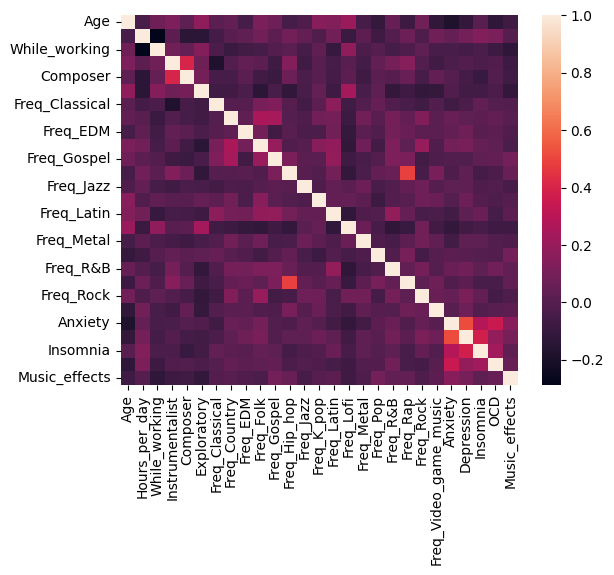

In [131]:
sns.heatmap(corr_matrix)

I notice that the values of correlation are generally very low, suggesting that there is not any strong linear correlation between the couples of columns. However, I search for the maximum positive and negative values of correlation.

In [143]:
corr_sequence = corr_matrix.unstack()
sorted_corr_sequence = corr_sequence.sort_values(kind = "quicksort")
sorted_corr_sequence[0:1], sorted_corr_sequence[-29:-28]

(Hours_per_day  While_working   -0.287855
 dtype: float64,
 Anxiety  Depression    0.520878
 dtype: float64)

#Plots